1 random over sampler

2 Smote

3 Under Sampler

4 tomek links

5 weights
"balance

6 stratify


5 ile alakasız üsttekiler ama bak nedir diye

hem stratify ile hem onsuz dene bak sonuçlara

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk
import matplotlib

In [3]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")  

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)
df.columns = ["target","text"]
df["target"] =df["target"].replace(["ham"],0)
df["target"] =df["target"].replace(["spam"],1)

In [7]:
df.duplicated().sum()

403

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["target"].value_counts()

0    4825
1     747
Name: target, dtype: int64

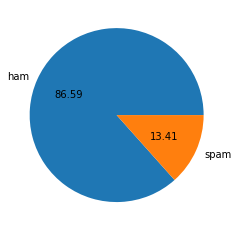

In [11]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct = "%0.2f");

In [13]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = [] 
    for i in text:
        if i.isalnum():
            y.append(i)
           
    
    text = y[:]
  
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [15]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [21]:
df["transformed_text"]=df["text"].apply(transform_text)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [23]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [24]:
y= df["target"].values

In [33]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state=42)
sm = SMOTE(random_state=42)

In [30]:
X_ros, y_ros = ros.fit_resample(X, y)

In [34]:
X_sm , y_sm = sm.fit_resample(X, y)

In [50]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
rus = RandomUnderSampler(random_state=42)
tmklks = TomekLinks(sampling_strategy="auto")

In [36]:
X_rus , y_rus = rus.fit_resample(X, y)

In [84]:
X_tmk , y_tmk = tmklks.fit_resample(X, y)

In [85]:
targets = [y, y_ros, y_sm, y_rus, y_tmk]
trains = [X, X_ros, X_sm, X_rus, X_tmk]

In [78]:
my_dict = {
    
    "TomekLinks_Length": [len(y_tmk)],
    "RandomUnderSampler_Length": [len(y_rus)],
    "Actual_Length": [len(y)],
    "RandomOverSampler_Length": [len(y_ros)],
    "SMOTE_Length": [len(y_sm)],

}

In [81]:
my_dict_df = pd.DataFrame.from_dict(data=my_dict, orient="index")

In [82]:
my_dict_df

,0
TomekLinks_Length,5569
RandomUnderSampler_Length,1494
Actual_Length,5572
RandomOverSampler_Length,9650
SMOTE_Length,9650


    Weights (balance) nedir

Çoğu ML algoritaması sınıfların çarpık dağılması ile kullanışlı değildir. Ancak, sınıfların çarpık dağılımını hesaba katmak için mevcut eğitim algoritmasını değiştirebiliriz. Bu, hem çoğunluk hem de azınlık sınıflarına farklı ağırlıklar vererek başarılabilir. Ağırlıklardaki fark, eğitim aşamasında sınıfların sınıflandırılmasını etkileyecektir. Tüm amaç, azınlık sınıfı tarafından yapılan yanlış sınıflandırmayı, daha yüksek bir sınıf ağırlığı belirleyerek ve aynı zamanda çoğunluk sınıfı için ağırlığı azaltarak cezalandırmaktır.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()

In [88]:
clfs = {
    "KNN":knn,
    "DT":dt,
    "LR":lr,
    "RF":rf,
    "AB":adb,
    "BG":bc,
    "EXT":etc,
    "GB":gb,
    "XGB":xgb
}

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
my_list=list()

for i, j in zip(trains,targets):
  x_train,x_test,y_train,y_test = train_test_split(i,j,test_size=0.2,random_state=42)
  my_dict2 = dict()
  for key,values in clfs.items():
    values.fit(x_train,y_train)
    y_pred = values.predict(x_test)
    my_dict2[key] = accuracy_score(y_test,y_pred)
  my_list.append(my_dict2)


In [96]:
my_list2=list()

for i, j in zip(trains,targets):
  x_train,x_test,y_train,y_test = train_test_split(i,j,test_size=0.2,random_state=42,stratify=j)
  my_dict2 = dict()
  for key,values in clfs.items():
    values.fit(x_train,y_train)
    y_pred = values.predict(x_test)
    my_dict2[key] = accuracy_score(y_test,y_pred)
  my_list2.append(my_dict2)

In [105]:
my_samp_list = [
    
    "TomekLinks_Length",
    "RandomUnderSampler_Length",
    "Actual_Length",
    "RandomOverSampler_Length",
    "SMOTE_Length"
]

In [ ]:
# Without Stratify accuracy scores

In [106]:
my_list_dff = pd.DataFrame(data=my_list,columns=clfs.keys())
my_list_dff["Inbalance_methods"] = my_samp_list
my_list_dff.set_index("Inbalance_methods",inplace=True)
my_list_dff

,KNN,DT,LR,RF,AB,BG,EXT,GB,XGB
Inbalance_methods,,,,,,,,,
TomekLinks_Length,0.920179,0.963229,0.946188,0.978475,0.966816,0.965022,0.978475,0.966816,0.956054
RandomUnderSampler_Length,0.979793,0.973575,0.983420,0.995855,0.951295,0.972539,0.998964,0.943005,0.935233
Actual_Length,0.662176,0.960622,0.951813,0.990674,0.965803,0.965285,0.993264,0.953886,0.956995
RandomOverSampler_Length,0.672241,0.929766,0.933110,0.943144,0.903010,0.923077,0.959866,0.923077,0.906355
SMOTE_Length,0.915619,0.961400,0.958707,0.975763,0.969479,0.965889,0.978456,0.964991,0.959605


In [ ]:
# With stratify accuracy scores

In [107]:
my_list_dff2 = pd.DataFrame(data=my_list2,columns=clfs.keys())
my_list_dff2["Inbalance_methods"] = my_samp_list
my_list_dff2.set_index("Inbalance_methods",inplace=True)
my_list_dff2

,KNN,DT,LR,RF,AB,BG,EXT,GB,XGB
Inbalance_methods,,,,,,,,,
TomekLinks_Length,0.917489,0.948879,0.961435,0.977578,0.962332,0.965919,0.979372,0.963229,0.955157
RandomUnderSampler_Length,0.990674,0.980311,0.988601,0.997409,0.949223,0.979793,0.997927,0.946632,0.925907
Actual_Length,0.670466,0.969430,0.951295,0.990674,0.956995,0.973057,0.991192,0.953368,0.956995
RandomOverSampler_Length,0.765886,0.909699,0.929766,0.946488,0.896321,0.936455,0.956522,0.906355,0.909699
SMOTE_Length,0.920108,0.948833,0.961400,0.977558,0.965889,0.958707,0.976661,0.966786,0.961400


In [ ]:
#Differences

In [109]:
diff_df = my_list_dff2 - my_list_dff
diff_df

,KNN,DT,LR,RF,AB,BG,EXT,GB,XGB
Inbalance_methods,,,,,,,,,
TomekLinks_Length,-0.002691,-0.014350,0.015247,-0.000897,-0.004484,0.000897,0.000897,-0.003587,-0.000897
RandomUnderSampler_Length,0.010881,0.006736,0.005181,0.001554,-0.002073,0.007254,-0.001036,0.003627,-0.009326
Actual_Length,0.008290,0.008808,-0.000518,0.000000,-0.008808,0.007772,-0.002073,-0.000518,0.000000
RandomOverSampler_Length,0.093645,-0.020067,-0.003344,0.003344,-0.006689,0.013378,-0.003344,-0.016722,0.003344
SMOTE_Length,0.004488,-0.012567,0.002693,0.001795,-0.003591,-0.007181,-0.001795,0.001795,0.001795
